In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
#warnings.filterwarning('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [2]:
train = pd.read_csv('houseprice/train.csv')
test = pd.read_csv('houseprice/test.csv')

In [3]:
print(train.shape)
test.shape

(1460, 81)


(1459, 80)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)


In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
train['SalePrice'].skew()

1.8828757597682129

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

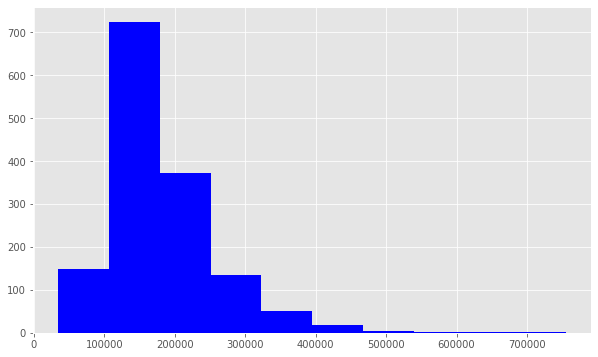

In [8]:
plt.hist(train['SalePrice'],color='blue')

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

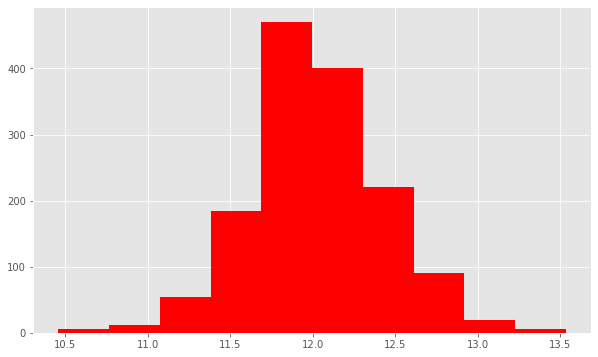

In [9]:
target = np.log(train['SalePrice'])
target.skew()
plt.hist(target,color='red')

In [10]:
col_numeros = train.select_dtypes(include=[np.number])
corr = col_numeros.corr()

In [11]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [12]:
#train = train.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)
#test = test.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)
print(train.OverallQual.unique())

[ 7  6  8  5  9  4 10  3  1  2]


In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


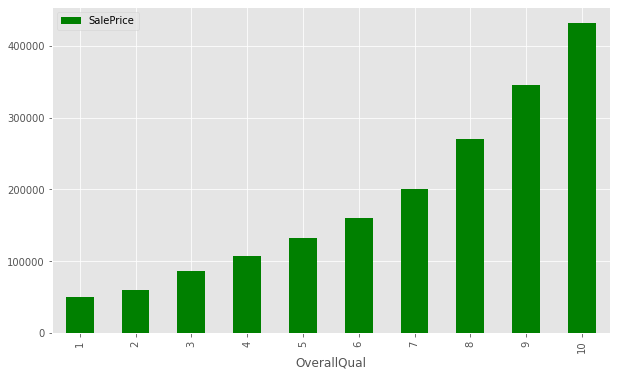

In [15]:
quality_pivot.plot(kind='bar',color='green')
plt.show()

ValueError: x and y must be the same size

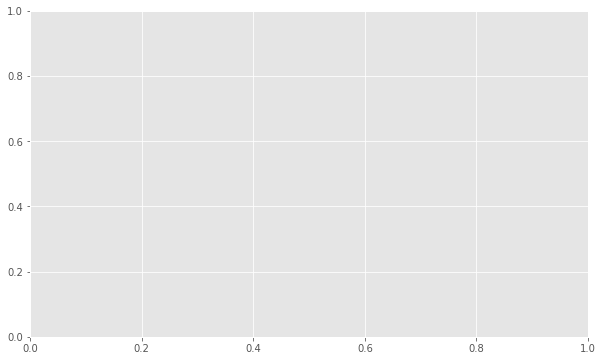

In [19]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.show()

In [17]:
#RETIRAR OUTLIERS DO GRLIVAREA
train['GrLivArea'].describe()
IQR = 1768-1126

LI = 1126-1.5*IQR
LS = 1768+1.5*IQR

print(LI)
print(LS)

train = train[train['GrLivArea'] <=LS]

163.0
2731.0


ValueError: x and y must be the same size

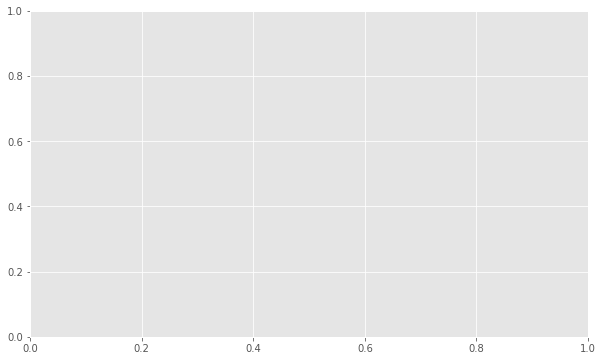

In [20]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.show()

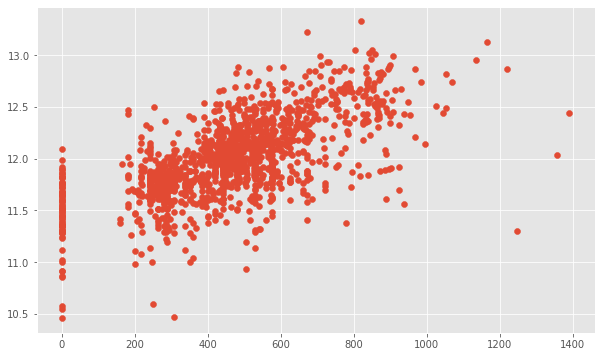

In [21]:

plt.scatter(x=train['GarageArea'],y=(np.log(train['SalePrice'])))


In [22]:
#definir limite superior pra tirar outlier do garagearea

IQR = 576-334

LI = 334-1.5*IQR
LS = 576+1.5*IQR

print(LI)
print(LS)

train['GarageArea'].describe()

train = train[train['GarageArea'] <= LS]

-29.0
939.0


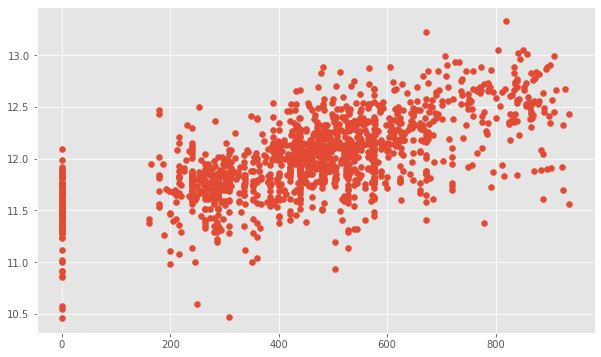

In [23]:
plt.scatter(x=train['GarageArea'],y=(np.log(train['SalePrice'])))

In [376]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False))
nulls.columns = ['Null Count']
nulls.head(25)

,Null Count
PoolQC,1409
MiscFeature,1361
Alley,1323
Fence,1138
FireplaceQu,686
LotFrontage,252
GarageYrBlt,79
GarageCond,79
GarageType,79
GarageFinish,79


In [377]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1412,1412,89,1412,1412,1412,1412,1412,1412,1412,...,1333,1333,1333,1333,1412,3,274,51,1412,1412
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1112,1408,49,898,1272,1411,1022,1339,222,1224,...,843,596,1269,1281,1293,2,153,47,1236,1170


In [378]:
pd.options.mode.chained_assignment = None
train['street_n'] = pd.get_dummies(train['Street'],drop_first=True)
test['street_n'] = pd.get_dummies(test['Street'],drop_first=True)

In [379]:
train['street_n'].value_counts()

1    1408
0       4
Name: street_n, dtype: int64

TypeError: 'str' object is not callable

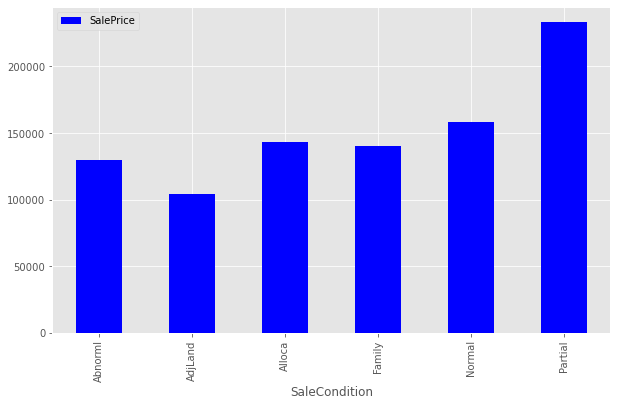

In [381]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [382]:
train.loc[train['SaleCondition'] == 'Partial','SaleCondition_n'] = 0
train.loc[train['SaleCondition'] != 'Partial','SaleCondition_n'] = 1

test.loc[test['SaleCondition'] == 'Partial','SaleCondition_n'] = 0
test.loc[test['SaleCondition'] == 'Partial','SaleCondition_n'] = 1


train['SaleCondition_n'].value_counts()

1.0    1302
0.0     110
Name: SaleCondition_n, dtype: int64

<AxesSubplot:xlabel='SaleCondition_n'>

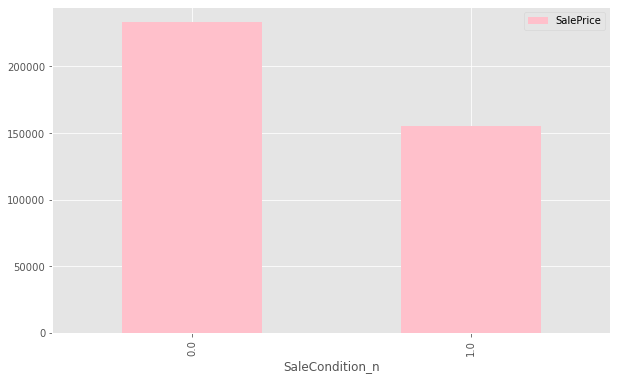

In [383]:
train.pivot_table(index='SaleCondition_n', values='SalePrice', aggfunc=np.median).plot(kind='bar',color='pink')

In [384]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
street_n           0
SaleCondition_n    0
dtype: int64

In [385]:
data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,street_n,SaleCondition_n
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,1,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,1,1.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,1,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,1,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,1,1.0


In [386]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,street_n,SaleCondition_n
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1,1.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,1.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1,1.0


In [395]:
#modelo

x = np.log(train['SalePrice'])
y = data.drop(['SalePrice'],axis=1)

x = x.values.reshape(-1,1)


In [396]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [397]:
lr = linear_model.LinearRegression()
modelo = lr.fit(x_train,y_train)

In [398]:
modelo.score(x_test,y_test)

0.14831621760899405